Visualizando resultados da tabela agregada

In [10]:

from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder \
    .appName("Data Exploration Gold") \
    .getOrCreate()

In [11]:
folder_name = '/home/fabiana/Área de Trabalho/assignment-diario-de-bordo-dados/data/outputs/gold'
df_gold = spark.read.parquet(folder_name)

In [12]:
df_gold.printSchema()

root
 |-- QT_CORR: long (nullable = true)
 |-- QT_CORR_NEG: long (nullable = true)
 |-- QT_CORR_PESS: long (nullable = true)
 |-- VL_MAX_DIST: integer (nullable = true)
 |-- VL_MIN_DIST: integer (nullable = true)
 |-- VL_AVG_DIST: double (nullable = true)
 |-- QT_CORR_REUNI: long (nullable = true)
 |-- QT_CORR_NAO_REUNI: long (nullable = true)
 |-- DT_REFE: date (nullable = true)



In [13]:
df_gold.show()

+-------+-----------+------------+-----------+-----------+-----------+-------------+-----------------+----------+
|QT_CORR|QT_CORR_NEG|QT_CORR_PESS|VL_MAX_DIST|VL_MIN_DIST|VL_AVG_DIST|QT_CORR_REUNI|QT_CORR_NAO_REUNI|   DT_REFE|
+-------+-----------+------------+-----------+-----------+-----------+-------------+-----------------+----------+
|      3|          3|           0|         19|         16|       17.3|            0|                3|2016-01-11|
|      1|          1|           0|        132|        132|      132.0|            0|                1|2016-10-21|
|      1|          1|           0|         62|         62|       62.0|            0|                1|2016-10-15|
|      4|          4|           0|       1956|         58|      546.3|            0|                4|2016-09-27|
|      4|          4|           0|         79|         38|       49.8|            0|                4|2016-11-04|
|      8|          8|           0|        127|          7|       51.4|            1|    

In [14]:
df_plot = df_gold.toPandas()
df_plot['DT_REFE'] = pd.to_datetime(df_plot['DT_REFE'])
df_plot['mes'] = df_plot['DT_REFE'].dt.to_period('M')


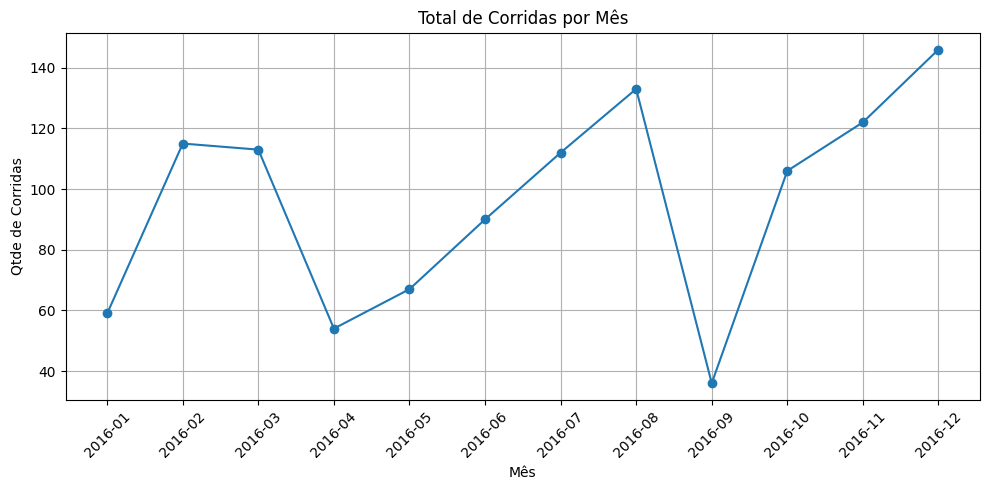

In [15]:

df_plot_mensal = df_plot.groupby('mes').agg({'QT_CORR': 'sum'}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot_mensal['mes'].astype(str), df_plot_mensal['QT_CORR'], marker='o')
plt.title("Total de Corridas por Mês")
plt.xlabel("Mês")
plt.ylabel("Qtde de Corridas")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


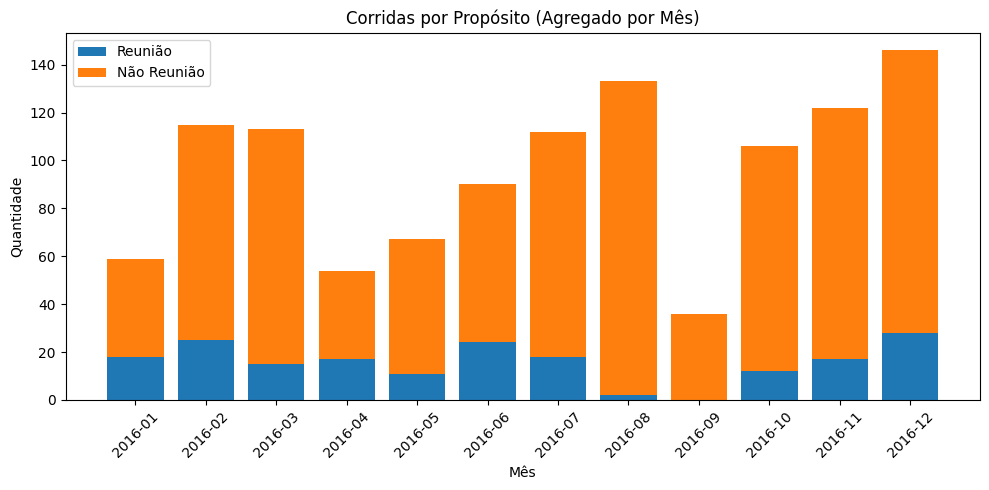

In [16]:
df_mensal = df_plot.groupby('mes', as_index=False).agg({
    'QT_CORR_REUNI': 'sum',
    'QT_CORR_NAO_REUNI': 'sum'
})

plt.figure(figsize=(10, 5))
plt.bar(df_mensal['mes'].astype(str), df_mensal['QT_CORR_REUNI'], label='Reunião')
plt.bar(df_mensal['mes'].astype(str), df_mensal['QT_CORR_NAO_REUNI'], 
        bottom=df_mensal['QT_CORR_REUNI'], label='Não Reunião')
plt.title("Corridas por Propósito (Agregado por Mês)")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




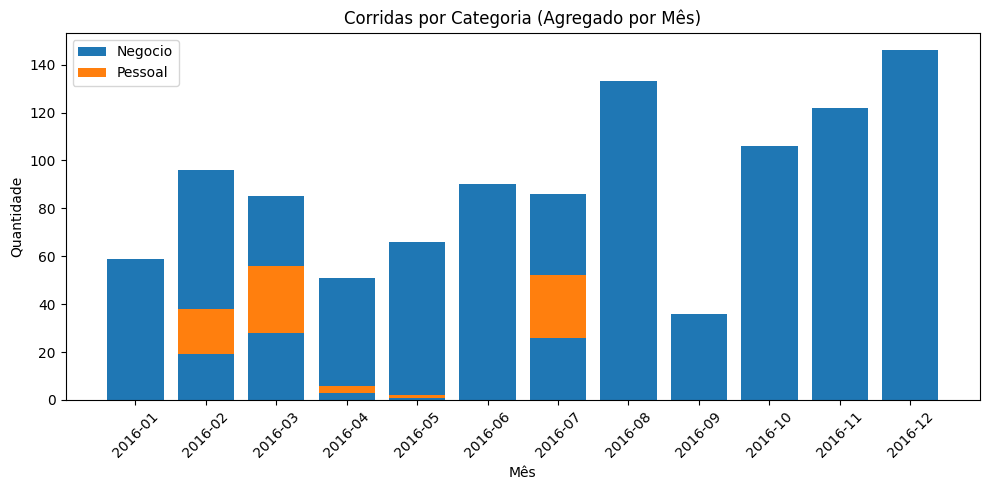

In [17]:
df_mensal = df_plot.groupby('mes', as_index=False).agg({
    'QT_CORR_NEG': 'sum',
    'QT_CORR_PESS': 'sum'
})

plt.figure(figsize=(10, 5))
plt.bar(df_mensal['mes'].astype(str), df_mensal['QT_CORR_NEG'], label='Negocio')
plt.bar(df_mensal['mes'].astype(str), df_mensal['QT_CORR_PESS'], 
        bottom=df_mensal['QT_CORR_PESS'], label='Pessoal')
plt.title("Corridas por Categoria (Agregado por Mês)")
plt.xlabel("Mês")
plt.ylabel("Quantidade")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


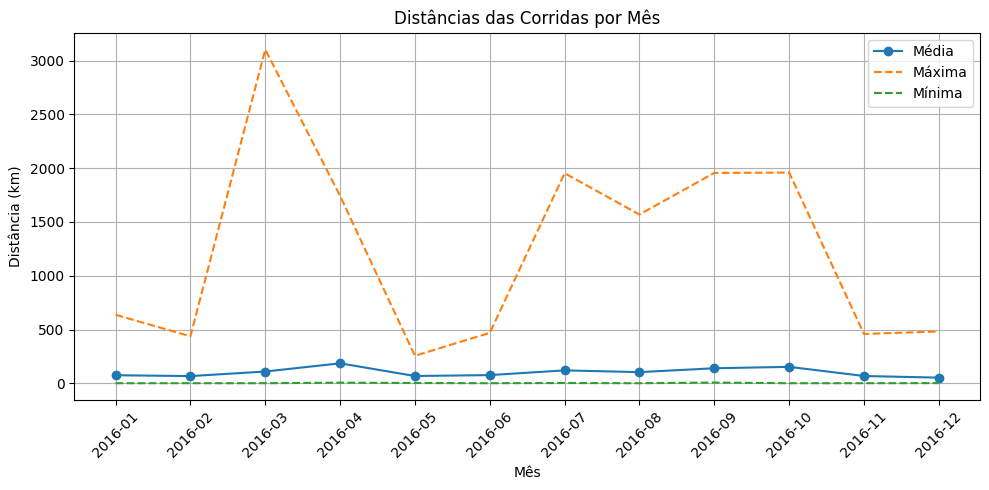

In [20]:
df_dist_mensal = df_plot.groupby('mes', as_index=False).agg({
    'VL_AVG_DIST': 'mean',
    'VL_MAX_DIST': 'max',
    'VL_MIN_DIST': 'min'
})


plt.figure(figsize=(10, 5))

plt.plot(df_dist_mensal['mes'].astype(str), df_dist_mensal['VL_AVG_DIST'], label='Média', marker='o')
plt.plot(df_dist_mensal['mes'].astype(str), df_dist_mensal['VL_MAX_DIST'], label='Máxima', linestyle='--')
plt.plot(df_dist_mensal['mes'].astype(str), df_dist_mensal['VL_MIN_DIST'], label='Mínima', linestyle='--')

plt.title("Distâncias das Corridas por Mês")
plt.xlabel("Mês")
plt.ylabel("Distância (km)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()